#    Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Вывод: По выводу первых десяти строк таблицы, а так же общим данным много недочетов резко бросилось в глаза. Например:
- is_apartment должен иметь тип bool;
- first_day_exposition должен иметь тип datetime, а не object;
- floors_total, parks_around3000, ponds_around3000, days_exposition должен иметь тип int;
- так же по многим столбцам замечено большое количество пропусков.
На первый взгляд выявили проблемные места, приступим к любимой обработке :)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Пропусков действительно очень много.  
</div>

### Шаг 2. Предобработка данных

Для начала выведем все столбцы нашего датафрейма для выявления нестандартных значений:

In [3]:
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


Для начала я хочу привести столбец first_day_exposition в формат Y-m-d, т.к. ни в одном объявлении это время не указано:

In [4]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

Теперь приведем days_exposition в тип int и заменим пропуски:

In [5]:
data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [6]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Пропуск может говорить о том, что квартира еще не продана. Вдруг такая замена смешает их с теми квартирами, которые по каким-то причинам были сразу же сняты? 
</div>

Заметил несколько пропущенных значений в locality_name, выведем количество уникальных значений:

In [7]:
data['locality_name'].value_counts()

Санкт-Петербург           15721
посёлок Мурино              522
посёлок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
поселок Дружноселье           1
деревня Новолисино            1
деревня Борисова Грива        1
деревня Снегирёвка            1
деревня Лупполово             1
Name: locality_name, Length: 364, dtype: int64

Что ж... На весь столбец 49 пропусков. Пока не понятно почему, будем смотреть дальше. Обработаем столбец с балконами. Как нам и сказали в условии, если в столбце с балконами есть пропуск, то их скорее всего 0. Заменим пропуски и приведем весь столбец в int:

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Думаю, их можно удалить. Ведь мы не можем быть уверены в том, что эти квартиры принадлежат рассматриваемой области. 
</div>

In [8]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

Странные значения у is_apartment, посмотрим в чем дело:

In [9]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Как мне кажется, он будет играть не сильную роль при дальнейшем исследовании. Многие люди не видят разницу между квартирой и апартаментами. Можно все значения заменить на False:

In [10]:
data['is_apartment'].fillna(False)

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: bool

Переведем итоговую цену в int:

In [11]:
data['last_price'] = data['last_price'].astype('int')

Посмотрим как ведет себя высота потолков:

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18545,6,3750000,43.0,2019-03-18,2,25.0,5.0,29.0,3,False,...,NaN,0,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12
355,17,3600000,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259
6246,6,3300000,44.4,2019-03-25,2,25.0,5.0,31.3,5,NaN,...,5.7,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,0
14382,9,1700000,35.0,2015-12-04,1,25.0,5.0,20.0,2,False,...,8.0,1,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206
11285,0,1950000,37.0,2019-03-20,1,25.0,5.0,17.0,4,False,...,9.0,2,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18
4643,0,4300000,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,...,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181
9379,5,3950000,42.0,2017-03-26,3,25.0,5.0,30.0,2,NaN,...,5.2,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,0
5669,4,4400000,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,...,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267
5807,17,8150000,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,...,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38
5246,0,2500000,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,...,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540


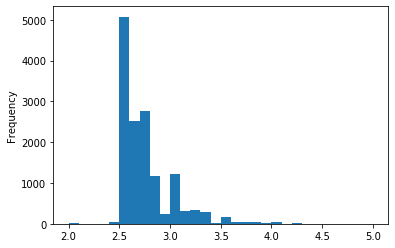

In [12]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(20)

In [13]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Тут у нас присутствуют явные выбросы. Есть значения, которые портят нам всю выборку. При этом медиана примерно равна среднему значению

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_aroun

In [15]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49
237,4,2438033,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251
457,4,9788348,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727
671,4,6051191,93.6,2017-04-06,3,NaN,NaN,47.10,8,NaN,...,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123
1757,5,3600000,39.0,2017-04-22,1,NaN,NaN,NaN,9,NaN,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.8,NaN,NaN,3,NaN,...,NaN,0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512
22656,4,4574160,64.5,2017-04-02,2,NaN,NaN,31.70,20,NaN,...,14.40,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127
22808,0,14569263,110.4,2016-11-20,3,NaN,NaN,45.38,6,NaN,...,23.42,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260
23590,0,21187872,123.3,2017-04-25,3,NaN,NaN,50.40,18,NaN,...,23.60,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104


In [16]:
data['airports_nearest'].value_counts()

37434.0    61
21928.0    32
39946.0    30
44870.0    30
37407.0    27
           ..
25122.0     1
26768.0     1
22248.0     1
20475.0     1
14579.0     1
Name: airports_nearest, Length: 8275, dtype: int64

In [17]:
data['cityCenters_nearest'].value_counts()

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
13104.0     1
11280.0     1
27218.0     1
10501.0     1
208.0       1
Name: cityCenters_nearest, Length: 7642, dtype: int64

In [18]:
data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [19]:
data['parks_nearest'].value_counts()

441.0     67
173.0     41
392.0     41
456.0     40
471.0     32
          ..
863.0      1
2880.0     1
969.0      1
1011.0     1
775.0      1
Name: parks_nearest, Length: 995, dtype: int64

In [20]:
data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Что можно сказать про оставшиеся пропуски? Можно ли их как-то заменить?
</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

По остальным пропускам: ceiling_height - из-за того что медиана от среднего отличается не сильно, я решил эти пропуски оставить как есть, по floors_total добавил ячейку 14, ничего общего я не заметил, так же взяв в расчёт количество пропусков, решил оставить как есть. Living_area - я думал произвести подсчёт среднего процента жилой площади от всей выборки и заполнить им пропуски, но мне показалось что особо смысла это иметь не будет. Пропуски в is_apartment видимо из-за того что большинство людей выкладывающих объявления просто не знаю что такое апартаменты, отсюда и пропуски. NaNы в locality_name мне не совсем понятны, поэтому оставил их без изменений. При этом есть гипотеза что это люди, которые живут в Питере, чтобы не сильно париться при подаче объявления, графу "Населённый пункт" они не заполняют, подразумевая что уже находятся в Питере. Что касается расположения парков, водоёмов, аэропортов, торговых центров - была у меня мысль брать данные откуда-то извне, например с тех же Яндекс карт, определять расстояние от квартиры до ближайшей точки и вписывать туда значение, однако я не совсем понял как это автоматизировать и поэтому принял что если там пропуск - значит в ближайшем радиусе ничего такого нет
    
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<h2> Комментарий ревьюера</h2>
    
- Потолки это довольно стандартизированная величина, поэтому можно безболезненно заменить их медианой. Можно также добавить группировку по населенному пункту, а для СПб — по расстоянию до центра.
    
    
    
- Пропуски в населенном пункте можно и удалить, ведь мы не можем быть уверены, что квартиры принадлежат Лен. области. Твоя гипотеза тоже хорошая, кстати.    
    
    
    
- По жилой площади и кухням предлагаю такой вариант:
    
    
    1. Группируем по комнатам. 
    2. Для каждой группы вычисляем отношение медианы жилой площади к медиане общей. С кухней то же самое.
    3. Заполняем жилую также в группировке по комнатам, умножая общую площадь на полученный ранее коэффициент отношения. Кухню заполняем так же.
    
    
    
Делать это не обязательно, но в будущем имей в виду, что подобные манипуляции с данными возможны :)    
</div>

### Шаг 3. Посчитайте и добавьте в таблицу:

- Цену за квадратный метр;
- День недели, месяц и год публикации объявления;
- Этаж квартиры; варианты — первый, последний, другой;
- Соотношение жилой и общей площади, а также отношение площади кухни к общей.

Цена за квадратный метр:

In [21]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']

In [22]:
#переведем для удобства в int
data['price_per_square_meter'].astype('int')

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_per_square_meter, Length: 23699, dtype: int64

Добавим день недели, месяц и год публикации:

In [23]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

 Добавлю функцию категоризации по этажам:

In [24]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Здесь же можно заодно проверить, нет ли таких ситуаций, что этаж рассматриваемой квартиры выше общего их числа в доме.
    
</div>

И в самом конце добавлю два столбца - соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [25]:
data['useful_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

In [26]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2.0,755.0,0,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,0.0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,2.0,574.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,3.0,234.0,424,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1.0,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

 #### 1. Начнем с постройки гистаграмм для площади, цены, числа комнат и высоты потолков: 

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

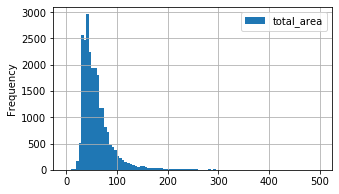

In [27]:
#площадь
data
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

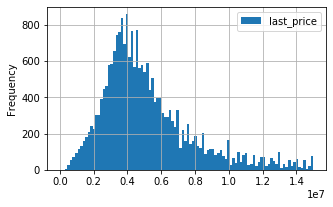

In [28]:
#цена
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
data['last_price'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

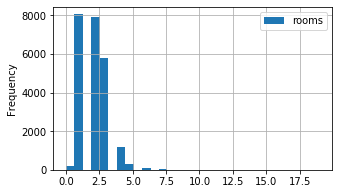

In [29]:
#изучим комнаты
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['rooms'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

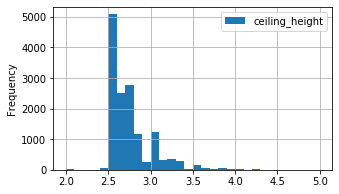

In [30]:
#и на конец высоту потолков:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()

Итак, опишу что интересного я увидел после построения всех гистограмм:
- Если Вы ищете в Питере дворец с площадью 900 квад.м, то придется очень сильно постараться чтобы в такую квартиру заселиться. Общая площадь колеблется от 12 до 900 квад.м, при этом преобладают квартиры от 40 до 50м, что в принципе очень похоже на правду. Чем больше площадь продаваемой квартиры - тем меньше таких квартир. Среднее значение 52м, а медиана - 60.
- Describe показывает что средняя стоимость квартир составляет 6,5 млн, а медиана 4,65.
- По количеству комнат - количество в нашем датасете количество комнат колеблется от 1 до 19. Среднее значение - 2, а медиана - 2.07.
- Высота потолков в среднем 2.65, в то время как медиана 2.77. Интересно, но встречаются и значения с потолком 1м, а максимальное 100

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Лучше под каждым графиком оставлять комментарии, чтобы клиенту не пришлось мотать туда-сюда страницу/презентацию. Сами графики желательно подписывать (оси + заголовок).</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Хорошо, спасибо! Стоит переделать? Возьму на вооружение в дальнейшей работе
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Нет, эта работа и так очень большая, просто впредь сразу при построении добавляй подписи :)    
</div>

#### 2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Для начала построим диаграмму размаха, а так же посмотрим, нет ли у нас выбивающихся значений:

(1, 1000)

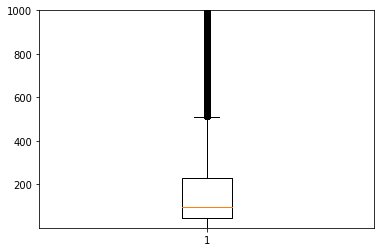

In [31]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

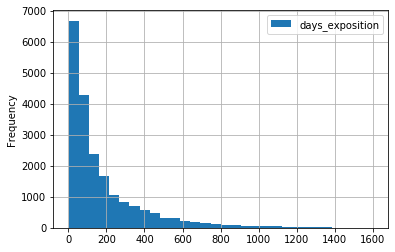

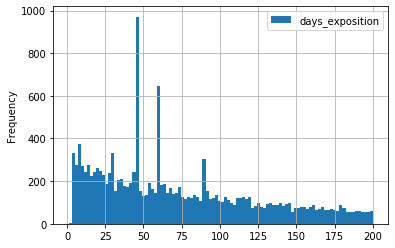

In [32]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

In [33]:
data[data['days_exposition']!=0]['days_exposition'].value_counts()

45      880
60      538
7       234
30      208
90      204
       ... 
807       1
871       1
951       1
999       1
1223      1
Name: days_exposition, Length: 1141, dtype: int64

In [34]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Итак, мы наглядно увидели что присутствуют значения, которые искажают наш результат. Наглядно по value_counts видно что у нас выбиваются значения 7, 30, 45, 60 и 90. Интересно, с чем связаны эти значения? Мы с командой наткнулись на очень интересный факт: загуглив правила размещения квартир на Яндекс Недвижимоси, мы нашли занимательную штуку: https://yandex.ru/support/realty/owner/home/add-ads-housing.html, 
а именно - сроки публикации объявлений. Для каждой квартиры, комнаты, гаража, апартаментов существуют свои сроки размещения.
<font color='red'> При просмотре последнего describe - напрашивается вывод: в среднем, на продажу квартиры уходит от 45 до 232 дней. При просмотре нашего boxplot очевидно что диаграмма размаха у нас идёт от минимального значения до 500 дней. Следовательно, очень быстрым периодом можно считать продажу до 45 дней, а очень долгим всё что выше 500 дней.  </font> 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Согласна :) </div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Очень здорово, что ты пользуешься внешними источниками информации :) </div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера</b>
    
В результате, какой период продажи можно назвать очень быстрым, а какой — очень долгим?    
</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Пардон, не ответил на поставленный вопрос. Добавлю другим цветом к прошлому выводу
</div>

#### 3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Для начала запишем в срез новый датафрейм без наших аномалий и построим диаграмму размаха:

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Почему нам здесь следует удалять эти данные? Быть может, в этом пункте речь о выбросах по основным характеристикам квартиры? Пожалуйста, ответь на первый вопрос и добавь обработку аномалий по цене, площади, потолкам и комнатам. Или аргументируй отсутствие необходимости их обработки. </div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Рассматривая возможные особенности у объявлений снятых через 45 дней, не было выявлено ничего особенного. Будем рассматривать что это аномалии. Так же поступим с объявлениями на 7,30,60 и 90 дней, поэтому было решено эти данные убрать.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Есть вероятность того, что на яндексе объявления автоматом снимаются после 45 или 60 дней. Возмонжо, это относится ко всем квартирам, а, может быть, к подозрительным. </div>

In [35]:
data[data['days_exposition']==45]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
78,9,4350000,37.0,2018-02-22,1,NaN,19.0,18.0,6,NaN,...,0.0,NaN,45,117567.567568,3,2,2018,другой,0.486486,0.289189
89,9,2500000,63.0,2018-10-25,3,2.50,5.0,43.0,4,NaN,...,NaN,NaN,45,39682.539683,3,10,2018,другой,0.682540,0.142857
110,6,3850000,72.3,2017-09-29,2,NaN,3.0,27.4,2,NaN,...,NaN,NaN,45,53250.345781,4,9,2017,другой,0.378976,0.326418
153,12,4350000,55.0,2017-05-21,2,2.57,9.0,31.2,2,NaN,...,0.0,NaN,45,79090.909091,6,5,2017,другой,0.567273,0.150909
158,15,3100000,47.3,2017-11-07,2,NaN,5.0,27.5,2,NaN,...,NaN,NaN,45,65539.112051,1,11,2017,другой,0.581395,0.179704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23601,10,2900000,43.4,2018-01-11,2,NaN,5.0,NaN,1,NaN,...,2.0,397.0,45,66820.276498,3,1,2018,первый,NaN,NaN
23613,4,3950000,52.0,2018-03-04,3,NaN,5.0,NaN,2,NaN,...,0.0,NaN,45,75961.538462,6,3,2018,другой,NaN,NaN
23670,9,2450000,45.6,2018-02-08,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,45,53728.070175,3,2,2018,другой,NaN,NaN
23679,0,2500000,35.0,2017-12-08,1,NaN,9.0,NaN,4,NaN,...,NaN,NaN,45,71428.571429,4,12,2017,другой,NaN,NaN


In [36]:
good_data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

(1, 1000)

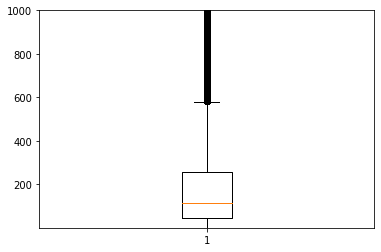

In [37]:
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,1000)

Снова построим гистограммы для разного количества корзин:

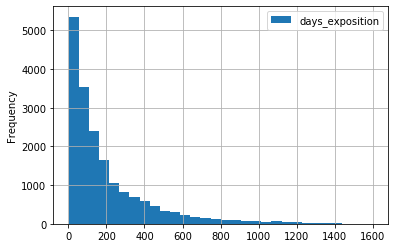

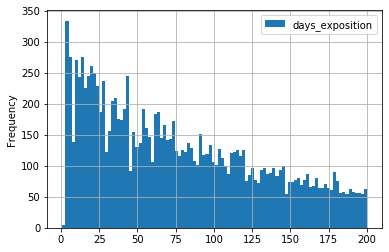

In [38]:
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

In [39]:
good_data['days_exposition'].describe()

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [40]:
good_data['days_exposition'].value_counts()

4       176
3       158
5       152
14      148
9       143
       ... 
807       1
871       1
951       1
999       1
1127      1
Name: days_exposition, Length: 1136, dtype: int64

Как и ожидалось, мы отсекли аномальные значения и получили более чистые данные. Теперь объявления о продаже квартир располагаются до 600 дней, а медиана 195 вместо 180

#### 4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Итак, посмотрим на зависимость стоимости квадратного метра от общей площади квартиры

0.30196021001472556

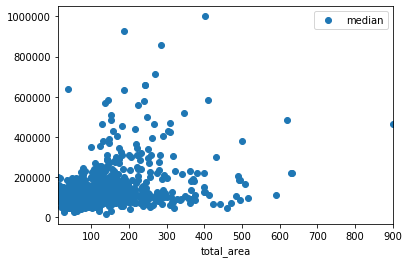

In [41]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['price_per_square_meter'])

Корреляция Пирсона = 0,302 значит зависимость очень слабая! Следовательно чем больше площадь, тем немного больше стоимость за кв.м. Хмм, давайте посомтрим на другие значения?

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера</b>
    
- Не забывай, что это коэфф-т линейной корреляции. Ее отсутствие не влечет отсутствие связи, т.к. последняя может быть нелинейной. Так что лучше еще и на графики обращать внимание, что ты и делаешь :)  Кстати, тест Пирсона не любит выбросы.
    
    
- Скажи, почему ты рассматриваешь цену квадрата вместо общей цены?    
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Я решил рассматривать цену квадрата по одной простой причине: она зависит от других параметров. Так например две одинаковые квартиры по площади, количеству комнат и с похожей инфраструктурой могут различаться по цене. Но одна при этом будет находиться в пределах КАДа, а вторая, например, в Кронштадте. 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Принято. </div>

0.05541965593528785

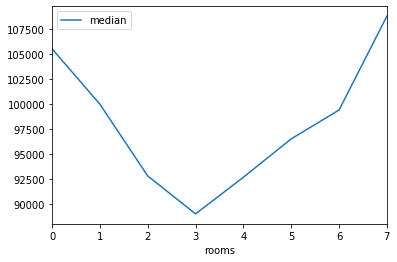

In [42]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['price_per_square_meter'])

Тут еще хуже. Корреляция Пирсона = 0.056, значит зависимость еще меньше. И действительно, в 3х комнатных квартирах самый дешевый квадратный метр, а если брать другой этаж?

,mean,count,median
floor_category,,,
первый,81983.559279,2917,81223.628692
последний,93410.716254,3336,87777.777778


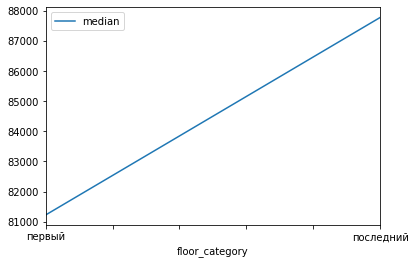

In [43]:
pivot_table_floor_category = data.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера</b>
    
Забываешь про другие этажи :)     
</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Вообще да. А стоило бы добавить, что по этому графику мы получили что в среднем цена за квадрат на первом этаже отличается от цены за квадрат на последнем этаже примерно на 10%
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Добавлю от себя график:</div>

Text(0, 0.5, 'Подпись')

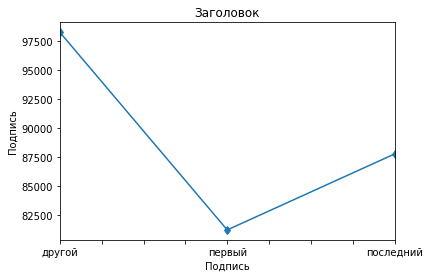

In [44]:
# КОД РЕВЬЮЕРА

data.groupby('floor_category')['price_per_square_meter'].agg('median').plot(marker='d')
plt.title('Заголовок')
plt.xlabel('Подпись')
plt.ylabel('Подпись')

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
На других этажах цена дороже, что тоже очевидно.</div>

Логика прослеживается. Согласно нашей медиане - чем выше этаж, тем дороже квадратный метр. Хотим еще логичнее? А что по удаленности от центра?

-0.3179507695934345

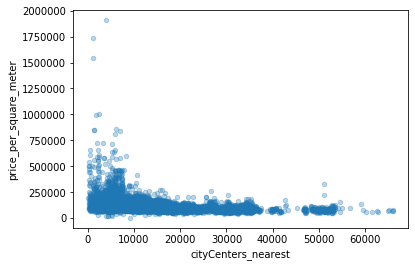

In [46]:
data.plot(kind = 'scatter', y = 'price_per_square_meter', x = 'cityCenters_nearest', alpha = 0.3)
data['cityCenters_nearest'].corr(data['price_per_square_meter'])

А вот и оно! Логичнее и некуда! Чем мы ближе к центру, тем дороже цена за квадратный метр

Изучим зависимость цены квадратного метра от даты размещения: дня недели.

,mean,count,median
weekday_exposition,,,
1,99734.539194,4183,95634.095634
2,99617.181736,3974,95473.807179
3,100162.906153,4295,95143.884892
0,99438.432027,3612,94688.910380
4,99012.143458,4000,94616.160238
6,97708.373982,1699,94501.718213
5,99018.170245,1936,93545.716727


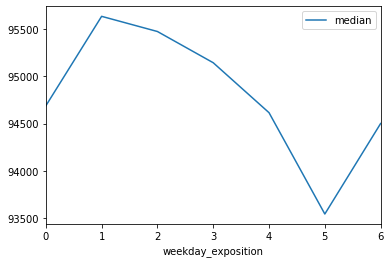

In [47]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')
pivot_table_weekday_exposition.sort_values('median', ascending = False)

Самый дорогой - это вторник. Люди, делающие объявления во вторник - самый жадные за кв.м. Интересно с чем это связано. Я бы предположил что всему виной - высокий трафик именно во вторник, но мы можем наблюдать приблизительно такой же и в среду и в четверг и в пятницу. Возможно это как то связано с загруженностью - в понедельник посмотрели объявления, собрали информацию, а во вторник выложили объявления со своей недвижимостью с расчетом на то что в течение остальных будних дней кто-то точно напишет или приедет посмотреть. В выходные активность падает. Оно и понятно, когда же отдыхать? Посмотрим что у нас по месяцам:

,mean,count,median
month_exposition,,,
4,101949.026219,2379,96451.612903
8,100110.528446,1744,96026.315789
9,100464.271234,1981,95607.235142
11,99230.870836,2371,95588.235294
3,98973.216068,2587,95238.095238
1,99862.581241,1500,95222.437478
2,98768.735441,2640,95000.000000
7,99625.641509,1695,95000.000000
12,99574.727173,1641,94262.299023


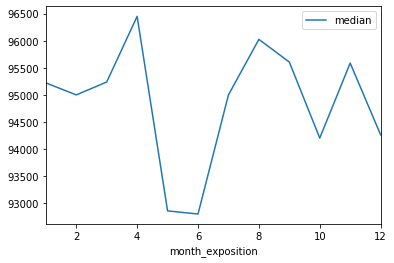

In [48]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')
pivot_table_month_exposition.sort_values('median', ascending = False)

И тут все в целом выглядит понятным: продажа квартир имеет свою сезонность. Некоторые люди продают свои квартиры в апреле чтобы отдохнуть в мае и июне. Там и активность плохая и цена за квадрат самая маленькая. Так же мы можем видеть что вторым дорогим месяцем является август. Посмотрим что у нас по годам:

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера</b>
    
Картина с месяцем и днем недели тянет на случайность. Ведь речь идет о дате размещения и о цене продажи. Разместить можно во вторник в мае, а продать в пятницу в ноябре, по более низкой цене. Это можно даже проверить, построив точно такие же графики для разных лет. Наверняка ситуация будет меняться.
</div>

,mean,count,median
year_exposition,,,
2014,124830.426426,137,107000.000000
2019,107123.780305,2879,103305.785124
2018,97773.557999,8519,95689.655172
2015,104614.200153,1191,93414.634146
2017,97621.876525,8190,92565.088448
2016,98322.343248,2783,91743.119266


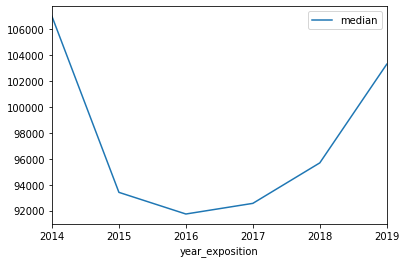

In [49]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')
pivot_table_year_exposition.sort_values('median', ascending = False)

До 16 года цена на рынке стремительно падала, а после начала расти

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера</b>
    
Все верно, ведь рынок недвижимости, как и любой другой, живой. Он зависит от экономики, покупательской способности и ключевой ставки. 
</div>

#### 5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [50]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
print(locality_pivot_table)

                   count           mean
locality_name                          
Санкт-Петербург    15721  114849.008794
посёлок Мурино       522   85752.189195
посёлок Шушары       440   78677.364217
Всеволожск           398   68654.473986
Пушкин               369  103125.819291
Колпино              338   75424.579098
посёлок Парголово    327   90175.913458
Гатчина              307   68746.146763
деревня Кудрово      299   92473.547576
Выборг               237   58141.909153


In [51]:
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean'] == locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008794


In [52]:
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean'] == locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141.909153


Самая высокая стоимость - в Санкт-Петербурге, в то время как самая низкая - в Выборге

#### 6. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

,price_per_square_meter
cityCenters_nearest_km,
0,187324.130319
1,166603.755531
2,146662.860056
3,129416.344615
4,137475.497055
5,146979.232519
6,152277.893519
7,141399.731456
8,120581.349830


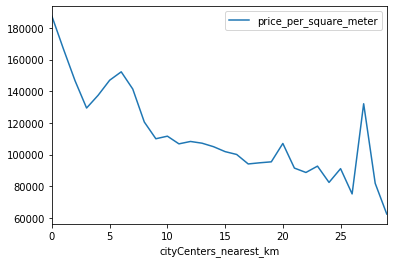

In [53]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

По этому графику можем считать центр Питера - зона с радиусом 6-7 километров.

#### 7. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Для начала возьмем за основу радиус центра Питера. Пусть это будет 6км

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Верно! Слишком большой радиус центра города я взял. Сузим радиус центра города до 3х:
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера</b>
    
Город не такой большой. 6 км захватит еще два района, помимо центра. Предлагаю 3 км. Подъем после 3 можно объяснить тем, что тут появляются квартиры с большей площадью. И это действительно так и есть. Если взять 5 км от центра на север, то попадем на очень и очень дорогую недвижимость с чуть ли не лучшим видом в городе. Хотя это не будет центральным районом. Я тебе предлагаю брать меньший радиус, руководствуясь здравым смыслом: диаметр 12 км это как-то многовато.  Как ты считаешь?
</div>

In [54]:
center_spb_data = data.query('cityCenters_nearest_km <= 3 and locality_name == "Санкт-Петербург"')

0.0017674536825169863

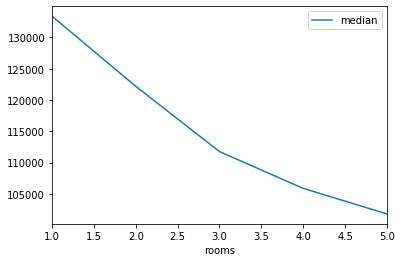

In [55]:
center_spb_rooms = center_spb_data.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median')
center_spb_rooms.query('count > 50').sort_values('median', ascending = False)
center_spb_data['rooms'].corr(center_spb_data['price_per_square_meter'])

Коэффициент корелляции Пирсона совсем мизерный. Я думаю что тут будет неуместно говорить о какой-то связи но она есть. давайте лучше обратимся к этажам:

<div class="alert alert-info">
<h2> Комментарий студента</h2>

В итоге график для радиуса центра города = 3км немного другой. Собственно, по медиане можно сказать что в центре Питера чем меньше комнат, тем выше цена за квадратный метр, в то время как во всей выборке стоимость квадратного метра уменьшается с приближением комнат к 3.
</div>

,mean,count,median
floor_category,,,
первый,123509.583016,164,107508.771930
последний,146999.179221,268,114432.499886


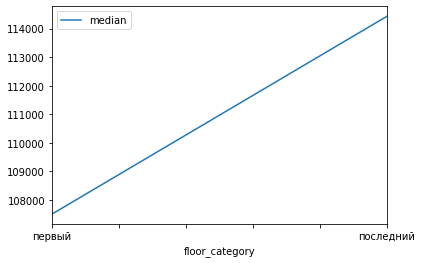

In [56]:
center_spb_floor_category = center_spb_data.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y = 'median')
center_spb_floor_category

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Здесь тоже нет других этажей. </div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Логика тут та же что и в анализе всей выборки. Различие только в самой цене. Безусловно, цена первого этажа отличается от цены последнего, но тут не такая разница. Тут разница между последним этажом и первым примерно 6%
</div>

Text(0, 0.5, 'Подпись')

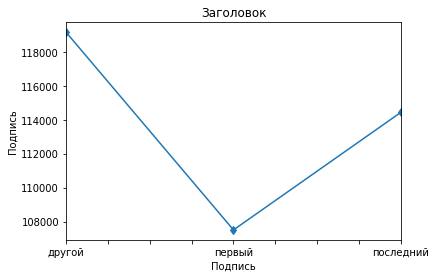

In [57]:
# КОД РЕВЬЮЕРА

center_spb_data.groupby('floor_category')['price_per_square_meter'].agg('median').plot(marker='d')
plt.title('Заголовок')
plt.xlabel('Подпись')
plt.ylabel('Подпись')

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Да, все так. </div>

То же самое что и везде. Чем выше этаж - тем дороже квадратный метр. Рассмотрим по удаленности от центра:

-0.16437504737656983

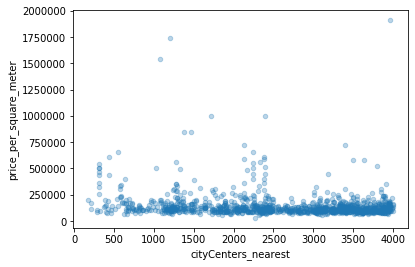

In [58]:
center_spb_data.plot(kind = 'scatter', y = 'price_per_square_meter', x = 'cityCenters_nearest', alpha = 0.3)
center_spb_data['cityCenters_nearest'].corr(center_spb_data['price_per_square_meter'])

Как и предполагалось, четкой зависимости тут нет. Возможно потому что мы уже выбрали как локацию центр Питера. Посмотрим на зависимость от дня недели размещения объявления:

,mean,count,median
weekday_exposition,,,
0,145551.499493,170,121354.322965
5,161508.488559,76,120568.086884
4,139253.094954,212,117984.375000
2,144333.466712,194,114903.120061
1,148325.540028,189,114209.827357
6,143555.437114,67,110843.373494
3,147413.473192,251,110132.158590


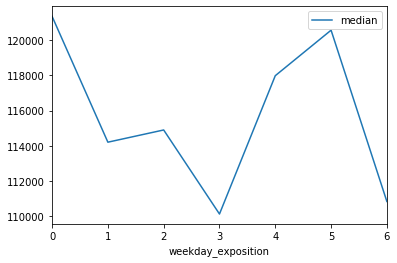

In [59]:
center_spb_weekday_exposition = center_spb_data.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_weekday_exposition.columns = ['mean', 'count', 'median']
center_spb_weekday_exposition.plot(y = 'median')
center_spb_weekday_exposition.sort_values('median', ascending = False)

С точностью да наоборот. В отличие от всей выборки - вторник и четверг самые маленькие значения. Самые высокие - понедельник, суббота и воскресенье. Посмотрим по месяцам:

,mean,count,median
month_exposition,,,
4,168983.339385,116,123095.124099
10,143129.501519,94,121978.411269
12,162850.307941,83,121568.627451
3,149574.931439,118,117409.562712
1,147760.544668,77,117244.897959
2,141961.199373,129,116406.250000
9,155582.053206,101,116054.158607
11,136308.801481,123,112639.593909
7,137695.003597,99,112195.121951


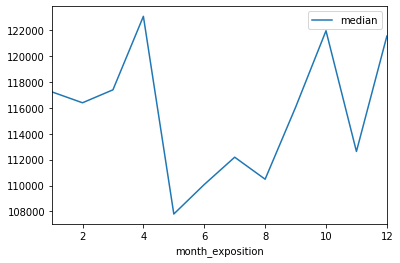

In [60]:
center_spb_month_exposition = center_spb_data.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_month_exposition.columns = ['mean', 'count', 'median']
center_spb_month_exposition.plot(y = 'median')
center_spb_month_exposition.sort_values('median', ascending = False)

Отличается от общей выборки, но не так кардинально. Самые высокие значения - январь и март. После апреля - резкий спад вплоть до августа (Тут совпадение с общей выборкой). Ну и взглянем что у нас по годам:

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Такой же комментарий, как и в случае со всей выборкой. </div>

,mean,count,median
year_exposition,,,
2019,173593.527909,127,131432.748538
2018,140129.848784,340,117898.844100
2017,141410.707775,418,114579.494604
2016,135593.316804,147,109090.909091
2015,154054.776299,118,107055.588611


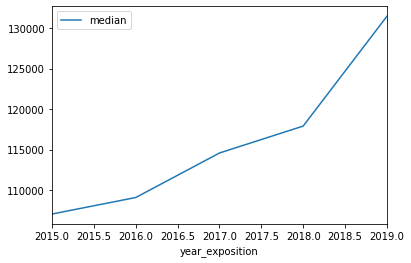

In [61]:
center_spb_year_exposition = center_spb_data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition.query('count > 50').plot(y = 'median')
center_spb_year_exposition.query('count > 50').sort_values('median', ascending = False)

Хмм, отличия от общей выборки так же на лицо: тут нет такого резкого скачка вниз. Цены совсем немного упали в 15 году, затем постоянно тянулись вверх.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Квадрату наплевать на покупательскую способность и прочее. Растет и все.  </div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Нет анализа площади и высоты потолков. </div>

In [62]:
center_spb_data['ceiling_height'].describe()

count    795.000000
mean       3.263321
std        1.376697
min        2.450000
25%        3.000000
50%        3.170000
75%        3.400000
max       32.000000
Name: ceiling_height, dtype: float64

In [63]:
center_spb_data['ceiling_height'].value_counts()

3.00    126
3.20     75
3.50     53
3.10     41
3.30     39
       ... 
2.91      1
3.03      1
3.62      1
4.14      1
3.22      1
Name: ceiling_height, Length: 115, dtype: int64

Потолки в центре Питера будут явно выше по отношению ко всей выборке. Напомню: средняя высота потолков по всей выборке 2.65, а медиана 2.77. В центре Питера среднее - 3.17, а медиана 3.26! Как говорит Яндекс.Кью (https://yandex.ru/q/question/pochemu_v_pitere_vysokie_potolki_8708e69f/) - в центре Питера огромное количество дворянских домов и дворцов. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Совершенно верно.</div>

In [64]:
center_spb_data['total_area'].describe()

count    1159.000000
mean       97.399172
std        55.772422
min        12.000000
25%        62.000000
50%        84.100000
75%       115.250000
max       517.000000
Name: total_area, dtype: float64

In [65]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

По площади скорее всего объяснение будет то же что и по потолкам. Большое количество дворянских домов, музеев, дворцов в центре Питербурга делает площадь помещений больше относительно всей выборки. Медиана центропитерских помещений отличается аж в полтора раза!

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
В итоге, в центре квартиры не только дороже, но и просторнее :)  </div>

### Шаг 5. Общий вывод

Что удалось сделать в рамках этого проекта: файл прочитан, данные обработаны. Анализ пропусков, произведена замена типов данных там где это необходимо. Добавлены некоторые вводные для дальнейшего удобства, а именно: цена квадратного метра; день, месяц и год публикации объявления; этаж квартиры; соотношение жилой и общей площади, а также отношение площади кухни к общей. Произведен исследовательский анализ в котором построены гистограммы для нескольких параметров, а так же изучено время продажи квартиры. Посчитана средняя цена квадратного метра в 10 разных населённых пунктах, а так же произведено сравнение динамика изменения цен в центре Питера по отношению ко всей выборке.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера</b>
    
Вывод хороший. В идеале стоит добавить медианы основных характеристик квартир для центра и для всей выборки, чтобы заказчику было понятно не только то, что квартиры в центре отличаются, но и то, как именно они отличаются. Кроме того, рекомендую тебе делать вывод безличным: вместо выражений *я сделал*, *мы получили*, *заменили* используй *произведен*, *получен*, *заменен*. Это хороший тон :) 
</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Общий вывод обезличен :) Буду стараться делать это везде
</div>